# Módulos Científicos

## Matplotlib

#### Suprimindo a Saída Final de uma Função

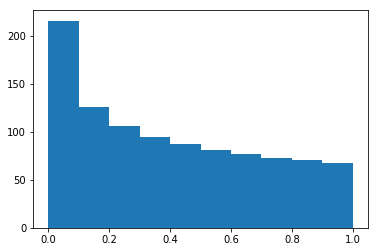

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy
x = numpy.linspace(0, 1, 1000)**1.5
# Nessa célula você verá a saída da função plt.hist(x)
plt.hist(x);

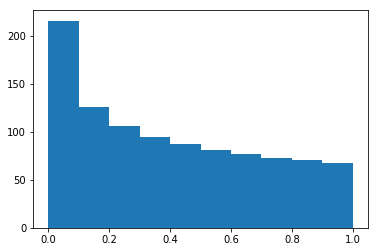

In [2]:
# acrescentando um ponto e vírgula ao final da linha, a saída da função é suprimida.
plt.hist(x);

## Numpy

### Escrevendo funções em outros idiomas 
Às vezes a velocidade das funções `numpy` não é suficiente e, portanto, é preciso escrever um código mais rápido. Em princípio, você pode compilar a função na biblioteca dinâmica e escrever _wrappers_ Python… Mas é muito melhor quando essa parte chata está pronta, certo? Você pode escrever funções em Cython ou Fortran e usá-las diretamente do código Python. 

Primeiro você precisa instalar:

In [3]:
%%python2
print 'Olá!'

Couldn't find program: 'python2'


In [5]:
!pip install cython fortran-magic

In [ ]:
%load_ext Cython

In [7]:
%%cython
def myltiply_by_2(float x):
    return 2.0 * x

DistutilsPlatformError: Unable to find vcvarsall.bat

In [8]:
myltiply_by_2(23.)

NameError: name 'myltiply_by_2' is not defined

Pessoalmente eu prefiro usar o Fortran, pois é mais conveniente para escrever funções de processamento de números. Mais detalhes do uso podem ser encontrados [aqui](http://arogozhnikov.github.io/2015/11/29/using-fortran-from-python.html).

In [10]:
%load_ext fortranmagic

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


In [12]:
%%fortran
subroutine compute_fortran(x, y, z)
    real, intent(in) :: x(:), y(:)
    real, intent(out) :: z(size(x, 1))
    z = sin(x + y)
end subroutine compute_fortran

RuntimeError: f2py failed, see output

In [13]:
compute_fortran([1, 2, 3], [4, 5, 6])

NameError: name 'compute_fortran' is not defined

### Instalando o RISE (apresentador de slides)

In [14]:
!pip install RISE

Em seguida, execute o seguinte código para instalar e ativar a extensão: 

In [ ]:
!jupyter-nbextension install rise --py --sys-prefix

In [1]:
!jupyter-nbextension enable  rise --py --sys-prefix

Could not figure out RISE version - using 0.0.0 (package.json not found)


Enabling notebook extension rise/main...
      - Validating: ok


***

## Pandas
O pacote **Pandas** é construído sobre o pacote **NumPy** e fornece ótimas ferramentas de estruturas e de análise de dados
em Python.  Seja para _Data Visualization_ ou para _Data Analysis_, a praticidade e funcionalidade que essa ferramenta oferece não é encontrada em nenhum outro módulo.  

Em geral, importa-se a biblioteca dessa forma:

```python
 >>> import pandas as pd
```

In [1]:
import pandas as pd
df = pd.DataFrame({ 'Letra': ['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c'],
                         'X': [4, 3, 5, 2, 1, 7, 7, 5, 9],
                         'Y': [0, 4, 3, 6, 7, 10, 11, 9, 13],
                         'Z': [1, 2, 3, 1, 2, 3, 1, 2, 3] })

In [2]:
df

,Letra,X,Y,Z
0,a,4,0,1
1,a,3,4,2
2,a,5,3,3
3,b,2,6,1
4,b,1,7,2
5,b,7,10,3
6,c,7,11,1
7,c,5,9,2
8,c,9,13,3


## Estruturas de Dados
### Séries
Um arranjo uni-dimensional (vetor) que pode conter qualquer tipo de dado (uma lista?). Mas os índices não precisam ser numéricos (um dicionário?).  
Exemplo:

In [7]:
s = pd.Series([3, -5, 7, 4], index=['a', 'b', 'c', 'd'])
s

a    3
b   -5
c    7
d    4
dtype: int64

### Frame de Dados (_Data Frame_)
Um arranjo de dados bi-dimensional com colunas de diferentes tipos de dados, ou seja, um conjunto de **Séries**.  
Exemplo:  

In [5]:
data = {'País':['Portugal', 'Peru', 'Chile'],'Capital':['Lisboa', 'Lima', 'Santiago'],'População':[751000, 1120000, 695000]}
df = pd.DataFrame(data, columns=['País', 'Capital', 'População'])
df

,País,Capital,População
0,Portugal,Lisboa,751000
1,Peru,Lima,1120000
2,Chile,Santiago,695000


### Selecionando Dados
#### Acessando Um Elemento 

In [8]:
s['b']

-5

#### Acessando um Subconjunto de um _Data Frame_

In [9]:
df[1:]

,País,Capital,População
1,Peru,Lima,1120000
2,Chile,Santiago,695000


### Outras Operações: Seleção, Indexação Booleana e Definição
#### Seleção por Posição (índice numérico)

In [10]:
df.iloc[0][0]                  # acessa somente o primeiro campo do primeiro registro (linha)

'Portugal'

In [11]:
df.iloc[2]                     # acessa todos os campos do registro 2

País            Chile
Capital      Santiago
População      695000
Name: 2, dtype: object

#### Seleção por Rótulo (índice não numérico)

In [12]:
df.loc[0]['País']              # acessa o campo 'País' do primeiro registro (linha)

'Portugal'

In [13]:
df.loc[:]['Capital']           # acessa o campo 'Capital' de todos os registros (linhas)

0      Lisboa
1        Lima
2    Santiago
Name: Capital, dtype: object

#### Indexação Booleana

In [14]:
s

a    3
b   -5
c    7
d    4
dtype: int64

In [15]:
s[~(s > 1)]

b   -5
dtype: int64

In [16]:
[(s < -1) | (s >= 6)]

[a    False
 b     True
 c     True
 d    False
 dtype: bool]

In [17]:
s[(s < -1) | (s >= 6)]

b   -5
c    7
dtype: int64

In [18]:
df[df['População'] > 1000000]

,País,Capital,População
1,Peru,Lima,1120000


#### Definição de Campos

In [19]:
s['a'] = 600
s

a    600
b     -5
c      7
d      4
dtype: int64

#### Apagando Elementos

In [20]:
s.drop(['a', 'c'])             # Deleta valores das linhas

b   -5
d    4
dtype: int64

In [21]:
df.drop('País', axis=1)        # Deleta valores da coluna

,Capital,População
0,Lisboa,751000
1,Lima,1120000
2,Santiago,695000


#### Classificação de Dados

In [22]:
df.sort_values(by='País')        # Ordena por linha ou coluna

,País,Capital,População
2,Chile,Santiago,695000
1,Peru,Lima,1120000
0,Portugal,Lisboa,751000


In [24]:
df.sort_values('País', ascending=False)  # ordem reversa

,País,Capital,População
0,Portugal,Lisboa,751000
1,Peru,Lima,1120000
2,Chile,Santiago,695000


In [51]:
df.rank()                        # Classifica as entradas 

,País,Capital,População
0,3.0,2.0,2.0
1,2.0,1.0,3.0
2,1.0,3.0,1.0


###  Informações de Séries e _Data Frames_
#### Informações básicas

In [52]:
df.shape                    # (linhas, colunas)
df.index                    # Descreve o índice 
df.columns                  # Descreve as colunas 
df.info()                   # informações sobre o data frame  
df.count()                  # qtde de valores não-NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
País         3 non-null object
Capital      3 non-null object
População    3 non-null int64
dtypes: int64(1), object(2)
memory usage: 152.0+ bytes


País         3
Capital      3
População    3
dtype: int64

#### Resumos

In [56]:
df.sum()                      # soma dos valores

País          PortugalPeruChile
Capital      LisboaLimaSantiago
População               2566000
dtype: object

In [57]:
df.cumsum()                   # soma acumulada

,País,Capital,População
0,Portugal,Lisboa,751000
1,PortugalPeru,LisboaLima,1871000
2,PortugalPeruChile,LisboaLimaSantiago,2566000


In [58]:
df.min(), df.max()            # valores mín e máx

(País          Chile
 Capital        Lima
 População    695000
 dtype: object, País         Portugal
 Capital      Santiago
 População     1120000
 dtype: object)

In [59]:
df.describe()                 # resumo estatístico

,População
count,3.000000e+00
mean,8.553333e+05
std,2.309120e+05
min,6.950000e+05
25%,7.230000e+05
50%,7.510000e+05
75%,9.355000e+05
max,1.120000e+06


In [60]:
df.mean()                     # média dos valores

População    855333.333333
dtype: float64

In [61]:
df.median()                   # mediana dos valores   

População    751000.0
dtype: float64

#### Alinhamento Interno de Dados

In [64]:
nova_serie = pd.Series([7, -2, 3], index=['a', 'c', 'd'])
s + nova_serie

a    607.0
b      NaN
c      5.0
d      7.0
dtype: float64

#### Operações Aritméticas com Métodos de Preenchimento
É possível alinhar dados usando métodos de preenchimento.

In [66]:
s.add(nova_serie, fill_value = 0)

a    607.0
b     -5.0
c      5.0
d      7.0
dtype: float64

In [67]:
s.sub(nova_serie, fill_value = 2)

a    593.0
b     -7.0
c      9.0
d      1.0
dtype: float64

In [68]:
s.div(nova_serie, fill_value = 4)

a    85.714286
b    -1.250000
c    -3.500000
d     1.333333
dtype: float64

In [69]:
s.mul(nova_serie, fill_value = 3)

a    4200.0
b     -15.0
c     -14.0
d      12.0
dtype: float64

#### Somando todos os valores presentes na Series por 2
s.add(2)
#### Subtraindo 2 de todos os valores
s.sub(2)
#### Multiplicando todos os valores por 2
s.mul(2)
#### Dividindo valores por 2
s.div(2)

### Aplicando Funções: 
#### Substituição de 'a' por 'b'

In [3]:
df.apply(lambda x: x.replace('a', 'b'))

,Letra,X,Y,Z
0,b,4,0,1
1,b,3,4,2
2,b,5,3,3
3,b,2,6,1
4,b,1,7,2
5,b,7,10,3
6,c,7,11,1
7,c,5,9,2
8,c,9,13,3


## E/S
### Leitura e Escrita em CSV

In [ ]:
pd.read_csv('arquivo.csv', header=None, nrows=5)
pd.to_csv('meudf.csv')

### Leitura e Escrita em Arquivo Excel

In [ ]:
pd.read_excel('arquivo.xls', sheetname='Pasta1')
pd.to_excel('meudf.csv', sheetname='Pasta1')

In [ ]:
xlsx = pd.ExcelFile('arquivo.xls')             # Lê múltiplas pastas de um mesma planilha (arquivo)
df = pd.read_excel('arquivo.xlsx', 'Pasta1')

## Ler e Escrever Consultas SQL ou Tabela de Dados

In [40]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')
pd.read_sql("SELECT * FROM m_tabela;", engine)
pd.read_sql_table('m_tabela', engine)
pd.read_sql_query("SELECT * FROM m_tabela;",engine)

OperationalError: (sqlite3.OperationalError) no such table: m_tabela [SQL: 'SELECT * FROM m_tabela;'] (Background on this error at: http://sqlalche.me/e/e3q8)

O método `read_sql()` é um wrapper conveniente ao redor de `read_sql_table()` e de `read_sql_query()`

In [41]:
pd.to_sql('meuDataFrame', engine)

AttributeError: module 'pandas' has no attribute 'to_sql'

## Lendo Arquivos CSV
Formato muito utilizado na exportação/importação de dados de Bancos de Dados, Planilhas, Aplicativos etc. 
O CSV é uma implementação particular de arquivos de texto com separação de campos por delimitador, no caso, a vírgula, e o caracter de nova-linha (new-line, '\n') para separar os registros. O formato também usa aspas nos campos que usam os delimitadores (caracteres reservados): vírgula e nova-linha.

Embora não exista uma especificação formal para o formato CSV, a RFC-4180 descreve um formato comum e estabelece 'text/csv' como um tipo MIME registrado na IANA. Formalmente, o CSV é um formato de dados que possui campos (colunas) separados por caracteres de vírgula e registros (linhas) separados por caracteres de nova-linha. Os campos que contiverem caracteres especiais (vírgula, nova-linha ou aspas) devem ser delimitados por aspas. Entretanto, se uma linha contiver uma única entrada do tipo _string_ vazia, ela também pode ser envolvida por aspas. Se um campo contiver um caractere aspa, ele é codificado via posicionamento de outra aspa logo em seguida. O formato CSV não exige codificação de caracteres, ordenação de bytes ou formato de terminador de linha.

(Fonte: vídeo Sandeco - https://www.youtube.com/watch?v=cdnNq4DCie4)

Com o Pandas fica muito fácil a leitura desses arquivos, acompanhe:

In [2]:
import pandas as pd
plantas = pd.read_csv('dat/iris.csv')            # fonte: github.com/sandeco
print(plantas)

    sepal length (cm);sepal width (cm);petal length (cm);petal width (cm);target
0                               5.1;3.5;1.4;0.2;SETOSA                          
1                                 4.9;3;1.4;0.2;SETOSA                          
2                               4.7;3.2;1.3;0.2;SETOSA                          
3                               4.6;3.1;1.5;0.2;SETOSA                          
4                                 5;3.6;1.4;0.2;SETOSA                          
5                               5.4;3.9;1.7;0.4;SETOSA                          
6                               4.6;3.4;1.4;0.3;SETOSA                          
7                                 5;3.4;1.5;0.2;SETOSA                          
8                               4.4;2.9;1.4;0.2;SETOSA                          
9                               4.9;3.1;1.5;0.1;SETOSA                          
10                              5.4;3.7;1.5;0.2;SETOSA                          
11                          